<a href="https://colab.research.google.com/github/HolyBayes/HSE-intro-to-DL/blob/master/seminars/sem-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## В этом ноутбуке:
1. Работаем с датасетом Fashion Mnist
2. Сделаем и обучим модель, которая будет классифицировать объекты из этого датасета. Всего классов 10
3. Посмотрим на более сложную модель, но дающую лучший результат на валидационной выборке
4. Посмотрим что такое Callbacks
5. Сделаем для нашей модели из п.2 Callback-tqdm, Callback для Keras, Callback для сохранения модели и напишем свой произвольный Callback

In [2]:
!pip install comet-ml
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="lODeHEtCf7XLaV6DJrOfugNcA",
                        project_name="general", workspace="holybayes")

     |████████████████████████████████| 184kB 7.1MB/s 
     |████████████████████████████████| 409kB 21.3MB/s 
     |████████████████████████████████| 204kB 22.7MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=8b5a41b43930d1eac8d5df3b0fea69c42b370f6d21ee0c557f1ba4e110b6caaf
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/holybayes/general/750d56ad94344a15ad2c5643f32bcbde



In [3]:
# Необходимые импорты
from keras import Sequential
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Reshape, InputLayer, Dropout
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Датасет встроен в Keras, так что его можно легко скачать:

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


В датасете всего 10 классов, перечислим их в списке fashion_mnist_labels:

In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


Также посмотрим на изображения:

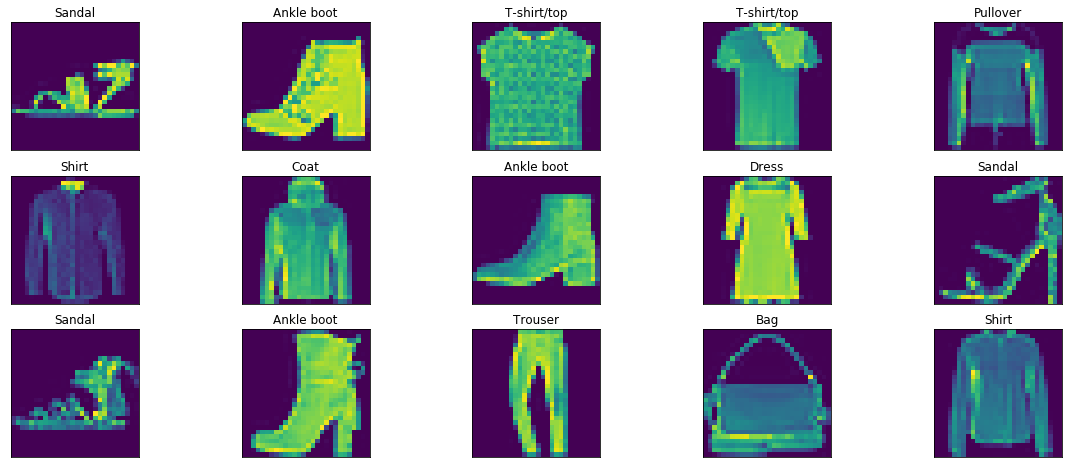

In [6]:
# Печатаем случайно выбранные 15 изображений:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    true_index = y_test[index]
    ax.set_title("{}".format(fashion_mnist_labels[true_index]))

Посмотрим каково число объектов в выборках:

In [7]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Число объектов в обучающей/тестовой выборках:
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


Посмотрим как выглядит y_train/y_test

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

__Вопрос__: Задача классификации, значит что необходимо сделать с y_train/y_test?

In [0]:
classes = 10
y_train, y_test = [keras.utils.to_categorical(y, classes) for y in [y_train, y_test]]

Теперь объявим модель. Можете использовать любые слои и всё, что мы узнали за прошедшую неделю

Модель должна достичь примерно 0.83 accuracy на валидачионной выборке

In [11]:
from keras.layers import Activation, BatchNormalization, MaxPooling2D
from keras.optimizers import SGD
chanDim = -1
INIT_LR = 1e-2

model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Reshape((28, 28, -1)))

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

# return the constructed network architecture













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile('adam', 'categorical_crossentropy', metrics=['acc'])

In [13]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE
COMET INFO: Ignoring automatic log_parameter('do_validation') because 'keras:do_validation' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/10
   64/60000 [..............................] - ETA: 1:46:41 - loss: 3.6872 - acc: 0.1094

COMET INFO: Ignoring automatic log_metric('batch_batch') because 'keras:batch_batch' is in COMET_LOGGING_METRICS_IGNORE
COMET INFO: Ignoring automatic log_metric('batch_size') because 'keras:batch_size' is in COMET_LOGGING_METRICS_IGNORE


60000/60000 [==============================] - 20s 332us/step - loss: 0.4415 - acc: 0.8485
Epoch 2/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.2880 - acc: 0.8975
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.2543 - acc: 0.9080
Epoch 4/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.2344 - acc: 0.9143
Epoch 5/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.2186 - acc: 0.9204
Epoch 6/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.2040 - acc: 0.9258
Epoch 7/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.1944 - acc: 0.9283
Epoch 8/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.1824 - acc: 0.9326
Epoch 9/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.1698 - acc: 0.9379
Epoch 10/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.1621 - ac

In [32]:
# Оценить качество модели на тестовом наборе:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_pred.argmax(1), y_test.argmax(1))

0.9343

Теперь сделаем небольшую визуализацию того, как работает модель:

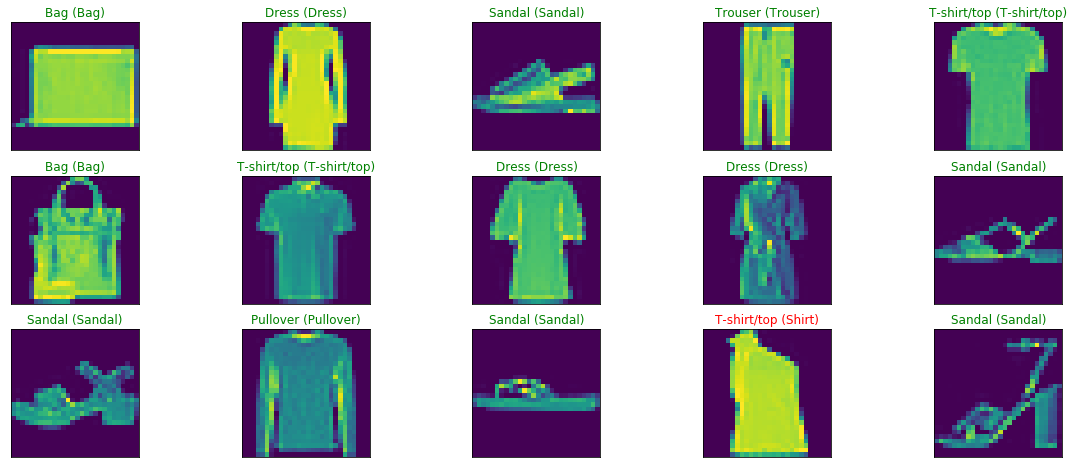

In [33]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Посмотрим теперь только на неверно предсказанные объекты:

In [0]:
y_hat_argmax = np.argmax(y_hat, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)
choose_wrong = ~(y_hat_argmax == y_test_argmax)
y_hat_wrong = y_hat[choose_wrong]
y_test_wrong = y_test[choose_wrong]
x_test_wrong = x_test[choose_wrong]

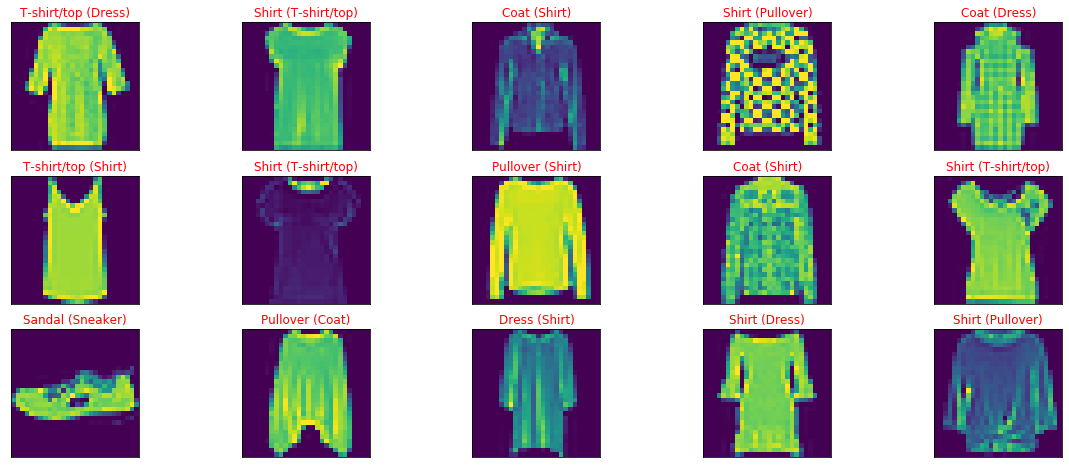

In [35]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(y_hat_wrong.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_wrong[index]))
    predict_index = np.argmax(y_hat_wrong[index])
    true_index = np.argmax(y_test_wrong[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Наконец, соберем метрики по каждому отдельному классу. Для этого есть метод classification_report в sklearn:

In [36]:
from sklearn.metrics import classification_report
y_test_arg = np.argmax(y_test, axis=1)
y_hat_arg = np.argmax(y_hat, axis=1)

print(classification_report(y_test_arg, y_hat_arg, target_names=fashion_mnist_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.86      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.90      0.91      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.89      0.91      0.90      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.78      0.81      0.80      1000
     Sneaker       0.96      0.99      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.99      0.98      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



Как видно, модель примерно на 5-ой эпохе достигает качества 0.92. А к 10-ой эпохе ~0.93

__Вопрос:__ Почему на некоторых эпохах accuracy < val_accuracy ?

## Кастомные метрики:

In [0]:
import keras.backend as K

def precision(y_true, y_pred):
    """Precision metric.
     Only computes a batch-wise average of precision.
     Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.
     Only computes a batch-wise average of recall.
     Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision, recall])

In [40]:
!pip install keras-tqdm

In [41]:
from keras_tqdm import TQDMNotebookCallback

model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[TQDMNotebookCallback(leave_inner=True)])

## CallBacks:

__Коллбеки__: это класс, имеющий набор методов on_train_begin, on_train_end, on_epoch_begin, on_epoch_end, on_batch_begin, on_batch_end, которые позволяют выполнять какой-либо код в конце эпохи, в начале эпохи, в конце батча, в начале батча, в конце обучения, в начале обучения

Примеры применения: 
 - Сохранение метрик качества в процессе обучения для онлайн визуализации
 - Отправление в телегреамм/почту метрик качества
 - Сохранение модели в конце каждой эпохи (можно даже после каждого батча)

Примеры реализованных в Керасе коллбеков:

 - EarlyStopping - делает раннюю остановку процесса обучения по некоторому критерию (например, лосс не падает n эпох)

 - ModelCheckpoint - сохраняет модель после каждой эпохи

 - RemoteMonitor - отправляет логи на сервер

 - TensorBoard - сохраняет логи в папки для последующей визуализации в TensorBoard

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping

""" Callbacks """
checkpointer = ModelCheckpoint('..\models\weights.{epoch:02d}-val_loss{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=True, mode='min', period=1)

""" Enable logging for Tensorboard """

# Скоращает learning rate, когда loss не уменьшается несколько эпох подряд:
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=0, mode='auto', min_delta=0.0001, min_lr=0)

# Останавливает обучение по какому либо критерию. Например, loss не уменьшается 3 эпохи подряд
early_stop = EarlyStopping(monitor='val_loss', patience=3)

tqdm = TQDMNotebookCallback(leave_inner=True)


model.fit(x=x_train, y=y_train, epochs=30, batch_size=32, verbose=0,
          validation_split=0.1, callbacks=[checkpointer, reduce, early_stop, tqdm])

Шаблон для своего коллбека:

In [0]:
class My_Callback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        return
 
    def on_train_end(self, logs={}):
        return
 
    def on_epoch_begin(self, logs={}):
        return
 
    def on_epoch_end(self, epoch, logs={}):
        return
 
    def on_batch_begin(self, batch, logs={}):
        return
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        return

### Чуть подробнее остановимся на Callback'е Comet.ML:

In [0]:
from sklearn.metrics import accuracy_score
class Comet_Callback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Plot a random sample of 10 test images, their predicted labels and ground truth
        y_hat = self.model.predict(x_test)
        acc = accuracy_score(y_hat.argmax(1), y_test.argmax(1))
        figure = plt.figure(figsize=(20, 8))
        for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
            ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
            # Display each image
            ax.imshow(np.squeeze(x_test[index]))
            predict_index = np.argmax(y_hat[index])
            true_index = np.argmax(y_test[index])
            # Set the title for each image
            ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                          fashion_mnist_labels[true_index]),
                                          color=("green" if predict_index == true_index else "red"))
        experiment.log_figure(figure=plt)
        experiment.log_metric('acc', acc, step=epoch)

In [0]:
model.fit(x=x_train, y=y_train, epochs=30, batch_size=32,
          validation_split=0.1, callbacks=[Comet_Callback()])

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 24s 452us/step - loss: 0.2032 - acc: 0.9261 - val_loss: 0.1543 - val_acc: 0.9403
Epoch 2/30
54000/54000 [==============================] - 24s 444us/step - loss: 0.1771 - acc: 0.9346 - val_loss: 0.1396 - val_acc: 0.9478
Epoch 3/30
54000/54000 [==============================] - 24s 451us/step - loss: 0.1692 - acc: 0.9385 - val_loss: 0.1592 - val_acc: 0.9423
Epoch 4/30
54000/54000 [==============================] - 25s 456us/step - loss: 0.1576 - acc: 0.9421 - val_loss: 0.1609 - val_acc: 0.9425
Epoch 5/30
54000/54000 [==============================] - 24s 454us/step - loss: 0.1565 - acc: 0.9425 - val_loss: 0.1517 - val_acc: 0.9458
Epoch 6/30
54000/54000 [==============================] - 25s 459us/step - loss: 0.1460 - acc: 0.9461 - val_loss: 0.1514 - val_acc: 0.9455
Epoch 7/30
54000/54000 [==============================] - 24s 452us/step - loss: 0.1376 - acc: 0.9499 - val_loss: 0.1